# T3.4 Regresión logística

# Índice

1. Codificación one-hot y distribución categórica
2. Modelo probabilístico de clasificación con softmax
3. Regresión logística
4. Aprendizaje por máxima verosimilitud
5. Algoritmo de aprendizaje con descenso por gradiente

# 1. Codificación one-hot y distribución categórica

**Variable categórica:** $\;$ variable aleatoria discreta que toma un valor de un conjunto finito de categorías (no ordenadas).

**Ejemplos de variables categóricas:** $\;$ color RGB, **etiqueta de clase,** palabra de un vocabulario, etc.

**Codificación one-hot:** $\;$ de una variable categórica $y$ que toma un valor entre $C$ posibles, $\,\{1,\dotsc,C\}$:
$$\operatorname{one-hot}(y)%
=\boldsymbol{y}%
=\begin{pmatrix}y_1\\\vdots\\y_C\end{pmatrix}%
=\begin{pmatrix}\mathbb{I}(y=1)\\\vdots\\\mathbb{I}(y=C)\end{pmatrix}\in\{0,1\}^C%
\quad\text{con}\quad%
\sum_{c=1}^{C} y_c=1$$

**Distribución categórica:** $\;$ distribución de probabilidades entre los $C$ posibles valores de una variable categórica, las probabilidades de las cuales vienen dadas por un vector parámetros $\,\boldsymbol{\theta}\in[0,1]^C\,$ tal que $\,\sum_{c=1}^{C}\theta_c=1$:
$$\operatorname{Cat}(y\mid\boldsymbol{\theta})=\prod_{c=1}^C\theta_c^{\mathbb{I}(y=c)}%
\qquad\text{o, en notación one-hot,}\qquad%
\operatorname{Cat}(\boldsymbol{y}\mid\boldsymbol{\theta})=\prod_{c=1}^C\theta_c^{y_c}$$

**Convención:** $\;0^0=1\;$ y $\;0\log 0=0\;.$ 

**Ejemplo de distribución categórica:** dados $\boldsymbol{y}=(1,0,0)^t\;$ y $\;\boldsymbol{\theta}=(0.5, 0.5, 0)^t,\;\operatorname{Cat}(\boldsymbol{y}\mid\boldsymbol{\theta})=0.5^10.5^00^0=0.5$

# 2. Modelo probabilístico de clasificación con softmax

**Normalización probabilística de clasificadores:** $\;$ todo clasificador definido con funciones discriminantes generales puede representarse mediante un clasificador equivalente con funciones discriminantes normalizadas probabilísticamente:
$$\begin{align*}
c(\boldsymbol{x})%
&=\operatorname*{argmax}\limits_c\;a_c && \text{donde $\,a_c = g_c(\boldsymbol{x})\,,$ función discriminante de la clase $c$ evaluada con $\boldsymbol{x}$}\\%
&=\operatorname*{argmax}\limits_c\;e^{a_c} && \text{con}\;h(z)=e^z\in\mathbb{R}^{\geq 0}\;\text{estrictamente creciente}\\%
&=\operatorname*{argmax}\limits_c\;\frac{e^{a_c}}{\sum_{c'} e^{a_{c'}}} && \text{con}\;h(z)=kz,\,k\;\text{constante positiva (invariable con $c$)}%
\end{align*}$$

**La función softmax:** $\;$ $\mathcal{S}(\boldsymbol{a})$ transforma un vector de **logits** (log-probabilidades no normalizadas) $\,\boldsymbol{a} = (a_1, a_2, ..., a_C) \in\mathbb{R}^C\,$ en uno de probabilidades $[0,1]^C$:
$$\mathcal{S}(\boldsymbol{a})=\left[%
\frac{e^{a_1}}{\sum_{\tilde{c}}e^{a_{\tilde{c}}}},\dotsc,%
\frac{e^{a_C}}{\sum_{\tilde{c}}e^{a_{\tilde{c}}}}\right] \in [0,1]^C%
\qquad\text{cumpliéndose}\qquad%
0\leq\mathcal{S}(\boldsymbol{a})_c\leq 1%
\quad\text{y}\quad%
\sum_{c=1}^{C} \mathcal{S}(\boldsymbol{a})_c=1$$

**Modelo probabilístico de clasificación con softmax:** $\;$ en vez de predecir una única clase más probable, predecimos las probabilidades de todas las clases a partir de una función predictora de logits, $\,f:\mathcal{X}\to\mathbb{R}^C,\,$ gobernada por un vector de parámetros $\,\boldsymbol{\theta}$:
$$p(\boldsymbol{y}\mid\boldsymbol{x},\boldsymbol{\theta})%
=\operatorname{Cat}(\boldsymbol{y}\mid\mathcal{S}(f(\boldsymbol{x};\boldsymbol{\theta})))%
=\prod_{c=1}^{C}(\mathcal{S}(f(\boldsymbol{x};\boldsymbol{\theta}))_c)^{y_c}$$

**Conveniencia del modelo en inferencia (clasificación):** $\;$ la predicción de las probabilidades de todas las clases permite aplicar reglas más generales que la Máxima A Posteriori (MAP), por ejemplo en caso de errores con costes diferentes. De hecho, si queremos aplicar la regla MAP, no hace falta *softmax-normalizar* logits.

**Conveniencia del modelo en aprendizaje:** $\;$ permite plantear el aprendizaje probabilísticamente, con criterios estándares como por ejemplo máxima verosimilitud. Además, gracias a la softmax, $\,f(\boldsymbol{x};\boldsymbol{\theta})\,$
puede elegirse libremente puesto que no está sujeta a las restricciones de probabilidad.

# 3. Regresión logística

**Regresión logística:** $\;$ modelo con softmax y **logits lineales** con la entrada (en notación homogénea):
$$p(\boldsymbol{y}\mid\boldsymbol{x},\mathbf{W})%
=\operatorname{Cat}(\boldsymbol{y}\mid\boldsymbol{\mu})%
\quad\text{con}\quad%
\boldsymbol{\mu}=\mathcal{S}(\boldsymbol{a}),\quad%
\boldsymbol{a}=f(\boldsymbol{x};\mathbf{W})=\mathbf{W}^t\boldsymbol{x},\quad%
\mathbf{W}\in\mathbb{R}^{(1+D)\times C}\quad\text{y}\quad\boldsymbol{x}\in\mathbb{R}^{(1+D)}$$

**Diferencia con los clasificadores basados en discriminantes lineales:** $\;$ ninguno, salvo que ahora predecimos las probabilidades de todas las clases.

**Ejemplo (cont. de Perceptrón):** $\quad C=D=2,\quad a_1=g_1(\boldsymbol{x})=-x_1-x_2+1,\quad a_2=g_2(\boldsymbol{x})=x_1+x_2-1$
$$\boldsymbol{a}=f(\boldsymbol{x};\mathbf{W})=\mathbf{W}^t\boldsymbol{x}%
\quad\text{con}\quad%
\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix}%
\quad\text{y}\quad%
\boldsymbol{x}=\begin{pmatrix}1\\x_1\\x_2\end{pmatrix}$$

<center>

|$\boldsymbol{x}^t$|$\boldsymbol{a}^t$|$\mu_1=\mathcal{S}(\boldsymbol{a})_1$|$\mu_2=\mathcal{S}(\boldsymbol{a})_2$|
|:-:|:-:|:-:|:-:|
|$(1,0,0)$|$(1,-1)$|$\frac{e^1}{e^1+e^{-1}}=0.8808$|$\frac{e^{-1}}{e^1+e^{-1}}=0.1192$|
|$(1,1,1)$|$(-1,1)$|$\frac{e^{-1}}{e^{-1}+e^1}=0.1192$|$\frac{e^1}{e^{-1}+e^1}=0.8808$|
|$(1,0.5,0.5)$|$(0,0)$|$\frac{e^0}{e^0+e^0}=0.5000$|$\frac{e^0}{e^0+e^0}=0.5000$|

</center>

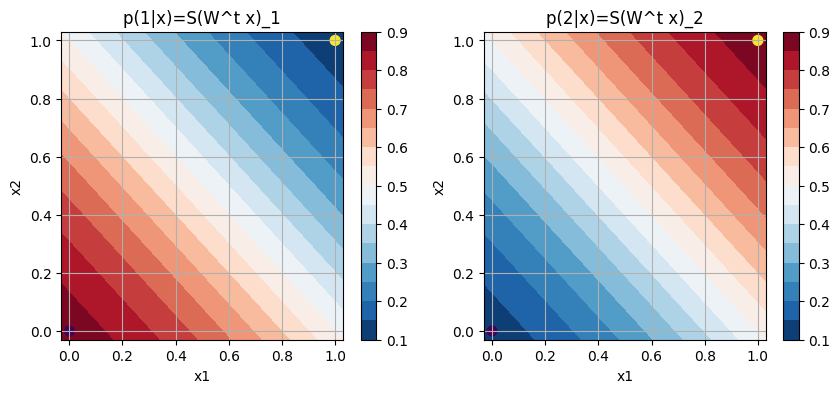

In [4]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0, 0], [1, 1]]).astype(float)
y = np.array([1, 2]).astype(int)
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]
Wt = np.array([[1, -1, -1], [-1, 1, 1]]).astype(float)
P = lambda x: (np.exp(Wt[0, 0] + Wt[0, 1:] @ x), np.exp(Wt[1, 0] + Wt[1, 1:] @ x))
PP = np.apply_along_axis(P, 1, XX)
PP = PP/PP.sum(axis=1, keepdims=True)
_, axs = plt.subplots(1, 2, figsize=(10, 4))
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(0., 1, 6))
    ax.set_yticks(np.linspace(0., 1, 6))
    ax.grid()
    ax.set_xlabel("x1"); ax.set_ylabel("x2");
    ax.set_title(f'p({i+1}|x)=S(W^t x)_{i+1}')
    cp = ax.contourf(x1, x2, PP[:, i].reshape(x1.shape), 15, cmap='RdBu_r')
    plt.colorbar(cp, ax=ax)
    ax.scatter(*X.T, c=y, s=50)

# 4. Aprendizaje por máxima verosimilitud

**Propósito:** $\;$ establecer un criterio para aprender $\,\mathbf{W}\,$ a partir de un conjunto de datos de entrenamiento, $\,\mathcal{D}=\{(\boldsymbol{x}_n,\boldsymbol{y}_n)\}_{n=1}^N$

## 4.1 Aprendizaje por máxima verosimilitud

**Log-verosimilitud (condicional):** $\;$ log-probabilidad de $\,\mathcal{D}\,$ interpretada como función de $\,\mathbf{W}$:
$$\begin{align*}
\operatorname{LL}(\mathbf{W})%
&=\log p(\mathcal{D}\mid\mathbf{W})=\log \prod_{n=1}^N p(\boldsymbol{y}_n\mid\boldsymbol{x}_n,\mathbf{W})\\%
&=\sum_{n=1}^N \log \operatorname{Cat}(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n)%
\qquad\text{con}\quad\boldsymbol{\mu}_n=\mathcal{S}(\boldsymbol{a}_n)\quad\text{y}\quad\boldsymbol{a}_n=\mathbf{W}^t\boldsymbol{x}_n\\%
&=\sum_{n=1}^N \log\prod_{c=1}^C \mu_{nc}^{y_{nc}}=\sum_{n=1}^N\sum_{c=1}^C \log \mu_{nc}^{y_{nc}}=\sum_{n=1}^N\sum_{c=1}^C y_{nc}\log\mu_{nc}%
\end{align*}$$

**Ejemplo (cont.):** $\;$ log-verosimilitud de $\;\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix}\;$ con $\;\mathcal{D}=\{((1,0,0)^t,(1,0)^t),\;((1,1,1)^t,(0,1)^t)\}$:
$$\begin{align*}
\operatorname{LL}(\mathbf{W})%
&=(y_{11}\log\mu_{11}+y_{12}\log\mu_{12})+(y_{21}\log\mu_{21}+y_{22}\log\mu_{22})\\%
&=\log\mu_{11}+\log\mu_{22}\\
&=\log 0.8808+\log 0.8808=-0.1269-0.1269=-0.2538
\end{align*}$$

**Aprendizaje por máxima verosimilitud:** $\;$ buscamos un $\,\mathbf{W}\,$ que otorgue máxima log-probabilidad a $\,\mathcal{D}$:
$$\mathbf{W}^*=\operatorname*{argmax}_{\mathbf{W}}\;\operatorname{LL}(\mathbf{W})$$

## 4.2 Planteamiento como un problema de minimización

**Neg-log-verosimilitud:** $\;$ log-verosimilitud con el signo cambiado y normalizada por el número de datos:
$$\operatorname{NLL}(\mathbf{W})%
=-\frac{1}{N}\operatorname{LL}(\mathbf{W})%
=-\frac{1}{N}\sum_{n=1}^N\sum_{c=1}^C y_{nc}\log\mu_{nc}%
\qquad\text{con}\quad%
\boldsymbol{\mu}_n=\mathcal{S}(\boldsymbol{a}_n)%
\quad\text{y}\quad%
\boldsymbol{a}_n=\mathbf{W}^t\boldsymbol{x}_n$$

**Ejemplo (cont.):** $\;$ neg-log-verosimilitud de $\;\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix}\;$ con $\;\mathcal{D}=\{((1,0,0)^t,(1,0)^t),\;((1,1,1)^t,(0,1)^t)\}$
$$\operatorname{NLL}(\mathbf{W})=-\frac{1}{2}\operatorname{LL}(\mathbf{W})=-\frac{1}{2}\cdot -0.2538 = 0.1269$$

**Riesgo empírico con log-pérdida:** $\;$ es el mismo que la NLL:
$$\mathcal{L}(\mathbf{W})%
=\frac{1}{N}\sum_{n=1}^N\ell(\boldsymbol{y}_n,\hat{\boldsymbol{y}}_n)%
=\operatorname{NLL}(\mathbf{W})%
\quad\text{con}\quad%
\ell(\boldsymbol{y}_n,\hat{\boldsymbol{y}}_n)%
=-\log p(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n)%
=-\sum_{c=1}^C y_{nc}\log\mu_{nc}$$
* Si el modelo asigna probabilidad uno en la clase correcta, la pérdida es nula;
* Si no, la pérdida será positiva y será más grande cuando menor sea la probabilidad asignada en la clase correcta.

**Aprendizaje por mínima NLL:** $\;$ aprendizaje por máxima verosimilitud planteado como un problema de minimización:
$$\mathbf{W}^*=\operatorname*{argmin}_{\mathbf{W}}\;\operatorname{NLL}(\mathbf{W})$$

**Ejemplo (cont.):** $\;\mathcal{D}=\{((1,0,0)^t,(1,0)^t),\;((1,1,1)^t,(0,1)^t)\};\;$ por simplicidad, suponemos que hemos de elegir por mínima NLL entre $\mathbf{W}$ y $\tilde{\mathbf{W}}$:
$$\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix}%
\qquad\text{y}\qquad%
\tilde{\mathbf{W}}^t=\begin{pmatrix}-1&1&1\\1&-1&-1\end{pmatrix}$$

Calculamos NLLs (la de $\mathbf{W}$ ya está calculada):

$$\operatorname{NLL}(\mathbf{W})%
=0.1269$$

$$\operatorname{NLL}(\tilde{\mathbf{W}})%
=-\frac{1}{2}(\log\tilde{\mu}_{11}+\log\tilde{\mu}_{22})%
=-\log\frac{e^{-1}}{e^{-1}+e^1}=\log(1+e^2)=2.1269$$

Elegimos $\mathbf{W}$ ya que su NLL es menor que la de $\,\tilde{\mathbf{W}}$.

# 5. Algoritmo de aprendizaje con descenso por gradiente

**Propósito:** $\;$ a diferencia del riesgo con pérdida 01 (tasa de error en entrenamiento), el riesgo con neg-log-pérdida (NLL) es derivable, por lo cual podemos minimizarlo con técnicas de optimización estándar como por ejemplo descenso por gradiente.

## 5.1 Descenso por gradiente

**Descenso por gradiente:** $\;$ algoritmo iterativo para minimizar un objetivo $\,\mathcal{L}(\boldsymbol{\theta})\,$ a partir de uno $\,\boldsymbol{\theta}_0\,$ dado
$$\boldsymbol{\theta}_{i+1}=\boldsymbol{\theta}_i-\eta_i\boldsymbol{\nabla}\mathcal{L}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}_i}\qquad i=0,1,\ldots$$

**Factor de aprendizaje:** $\;\eta_i>0\,$ juega el mismo papel que en Perceptrón. Podemos elegir un valor constante pequeño, $\,\eta_i=\eta$.

**Dirección de descenso más pronunciada:** $\;-\boldsymbol{\nabla}\mathcal{L}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}_i}\,$ es el neg-gradiente del objetivo evaluado a $\boldsymbol{\theta}_i$.

**Convergencia:** $\;$ si $\,\eta\,$ no es muy grande y el objetivo es convexo (con forma de bol), converge a un mínimo (global).

**Criterio de parada:** la magnitud de actualización de parámetros $\Delta = \eta_i\boldsymbol{\nabla}\mathcal{L}(\boldsymbol{\theta})$ es inferior a un valor de **tolerancia mínima** (determinado empíricamente).

**Ejemplo (sencillo):** $\;\mathcal{L}(\theta)=\theta^2,\,$ $\theta_0=10,\,$ $\eta_t=0.2,\,$ $\frac{d\mathcal{L}}{d\theta}=2\theta\,$ y tolerancia $0.01$

In [15]:
import numpy as np
grad = lambda t: 2*t
theta = 10
eta = 0.2
tolerancia = 0.01
delta = np.inf
print("# -eta*grad", "Theta", "NLL(Riesgo)")
print(np.round(delta, 4), np.round(theta, 4), np.round(theta*theta, 4))
while np.abs(delta) > tolerancia:
	delta = -eta * grad(theta)
	theta += delta
	print(np.round(delta, 4), np.round(theta, 4), np.round(theta*theta, 4))

# -eta*grad Theta NLL(Riesgo)
inf 10 100
-4.0 6.0 36.0
-2.4 3.6 12.96
-1.44 2.16 4.6656
-0.864 1.296 1.6796
-0.5184 0.7776 0.6047
-0.311 0.4666 0.2177
-0.1866 0.2799 0.0784
-0.112 0.168 0.0282
-0.0672 0.1008 0.0102
-0.0403 0.0605 0.0037
-0.0242 0.0363 0.0013
-0.0145 0.0218 0.0005
-0.0087 0.0131 0.0002


## 5.2 Descenso por gradiente aplicado a regresión logística

**NLL:** $\;$ la NLL es una función objetivo convexa:
$$\operatorname{NLL}(\mathbf{W})%
=\frac{1}{N}\sum_{n=1}^N-\log p(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n)
\qquad\text{con}\quad%
\boldsymbol{\mu}_n=\mathcal{S}(\boldsymbol{a}_n)%
\quad\text{y}\quad%
\boldsymbol{a}_n=\mathbf{W}^t\boldsymbol{x}_n$$

**Gradiente de la NLL:** $\;$ haremos uso del siguiente resultado, **sin demostración**:
$$\boldsymbol{\nabla}\mathcal{L}(\boldsymbol{W}) = 
\frac{\partial\operatorname{NLL}}{\partial\mathbf{W}^t} =%
\begin{pmatrix}%
\frac{\partial\operatorname{NLL}}{\partial W_{11}}&\cdots&\frac{\partial\operatorname{NLL}}{\partial W_{1C}}\\%
\vdots&\ddots&\vdots\\%
\frac{\partial\operatorname{NLL}}{\partial W_{D1}}&\cdots&\frac{\partial\operatorname{NLL}}{\partial W_{DC}}\\%
\end{pmatrix}
=\frac{1}{N}\sum_{n=1}^N\frac{\partial(-\log p(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n))}{\partial\mathbf{W}^t}%
=...=\frac{1}{N}\sum_{n=1}^N\boldsymbol{x}_n(\boldsymbol{\mu}_n-\boldsymbol{y}_n)^t$$

**Descenso por gradiente aplicado a regresión logística:** $\displaystyle\quad\mathbf{W}_0=\mathbf{0};\quad\mathbf{W}_{i+1}=\mathbf{W}_i-\eta_i\frac{\partial\operatorname{NLL}}{\partial\mathbf{W}^t}\biggr\vert_{\mathbf{W}_i}\quad i=0,1,\ldots$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 0, 0], [1, 1, 1]]).astype(float)
N, D = X.shape
y = np.array([[1, 0], [0, 1]]).astype(int)
_, C = y.shape
W = np.zeros((D, C)).astype(float)
Z = np.zeros((N, C)).astype(float)

eta, tol, delta = 0.2, 0.01, np.inf
while np.any(np.abs(delta) > tol):
    Z = np.apply_along_axis(np.exp, 1, X @ W)
    Z /= np.sum(Z, axis=1, keepdims=True)
    Z -= y
    delta = -eta/N * X.T @ Z
    W += delta
print(W)

[[ 0.7297801 -0.7297801]
 [-0.9399284  0.9399284]
 [-0.9399284  0.9399284]]


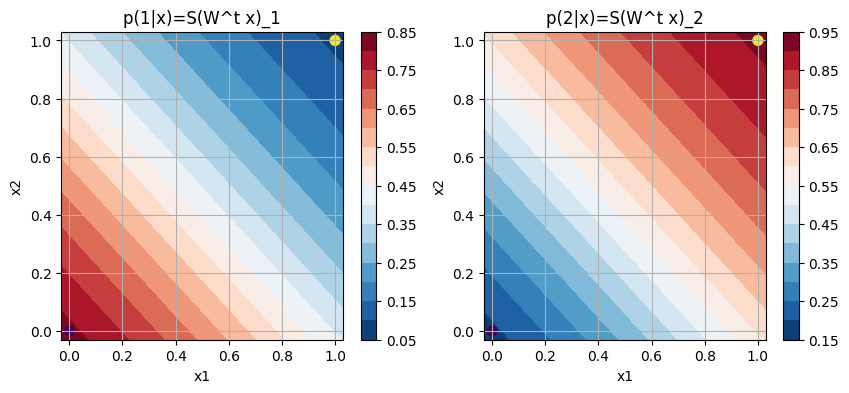

In [10]:
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ones(50*50), np.ravel(x1), np.ravel(x2)]
Z = np.apply_along_axis(np.exp, 1, XX @ W)
Z = Z/Z.sum(axis=1, keepdims=True)
_, axs = plt.subplots(1, 2, figsize=(10, 4))
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(0., 1, 6))
    ax.set_yticks(np.linspace(0., 1, 6))
    ax.grid()
    ax.set_xlabel("x1"); ax.set_ylabel("x2");
    ax.set_title(f'p({i+1}|x)=S(W^t x)_{i+1}')
    cp = ax.contourf(x1, x2, Z[:, i].reshape(x1.shape), 15, cmap='RdBu_r')
    plt.colorbar(cp, ax=ax)
    ax.scatter(*X[:,1:].T, c=range(1,C+1), s=50)